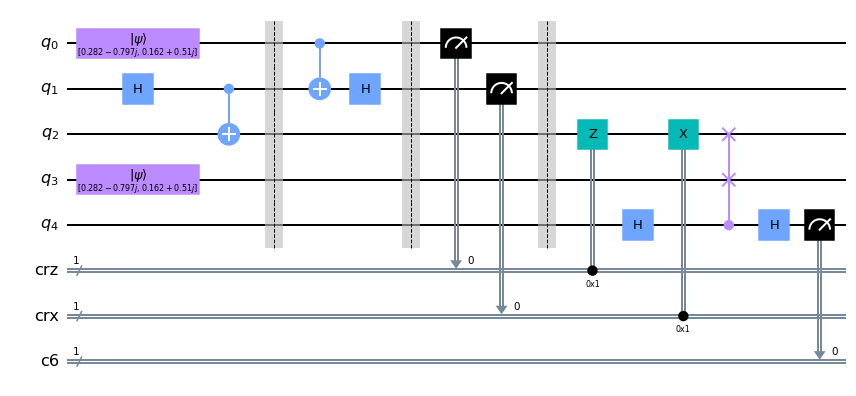

In [27]:
# teleportation
import numpy as np
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector
from math import sqrt, pi

qr= QuantumRegister(5, name='q')
crz=ClassicalRegister(1,name='crz')
crx=ClassicalRegister(1,name='crx')
qc= QuantumCircuit(qr,crz,crx)

initial_state = random_statevector(2)
qc.initialize(initial_state, 3)
qc.initialize(initial_state, 0)

def create_bell_pair(qc,a,b):
    qc.h(a)
    qc.cx(a,b)
def alice_states(qc,a,b):
    qc.cx(a,b)
    qc.h(b)
def measure(qc,a,b):
    qc.barrier()
    qc.measure([a,b],[0,1])
def bob(qc,q,crz,crx):
    qc.barrier()
    qc.z(q).c_if(crz,1)
    qc.x(q).c_if(crx,1)


#1
create_bell_pair(qc,1,2)
#2
qc.barrier()
alice_states(qc,0,1)
#3
measure(qc,0,1)
#4
bob(qc,2,crz,crx)

qc.h(4)
qc.cswap(4,3,2)
qc.h(4)

cr_result = ClassicalRegister(1)
qc.add_register(cr_result)
qc.measure(4,2)

qc.draw()




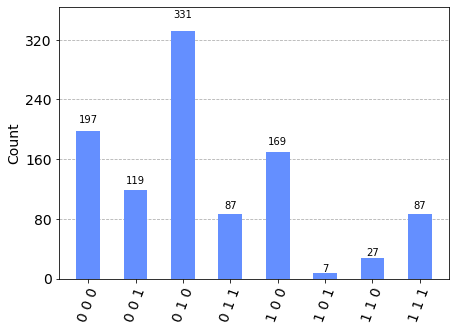

In [28]:
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
t_qc.save_statevector()
counts = sim.run(t_qc).result().get_counts()
plot_histogram(counts)


In [29]:
print(counts)

{'1 0 1': 7, '1 1 0': 27, '1 0 0': 169, '0 1 1': 87, '1 1 1': 87, '0 0 0': 197, '0 1 0': 331, '0 0 1': 119}


In [30]:
from qiskit.quantum_info import Statevector

backend = Aer.get_backend('statevector_simulator')
outputstate = backend.run(qc, shots=1000).result().get_statevector()
probs = Statevector(outputstate).probabilities()
print(probs)

[0.         0.         0.         0.62640121 0.         0.
 0.         0.06128581 0.         0.         0.         0.06128581
 0.         0.         0.         0.25102717 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]
